<a href="https://colab.research.google.com/github/ValentinaNCh/Trabajo-Mineria/blob/main/Proyecto_miner%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicción TRM**

In [1]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import scipy as sp

In [2]:
df = pd.read_excel('/content/tasa.xlsx',index_col=0, parse_dates=True)
tm=pd.Series(df['tasa'], df.index)
print(tm)


Fecha
2001-01-01    16.694680
2001-02-01    17.307023
2001-03-01    15.705056
2001-04-01    14.589864
2001-05-01    14.226299
                ...    
2021-01-01    17.266775
2021-02-01    15.885255
2021-03-01    14.180513
2021-04-01    15.052796
2021-05-01    15.632188
Name: tasa, Length: 245, dtype: float64


In [3]:
df
df.sort_values('Fecha', ascending=True, inplace=True)

In [4]:
df[:227].describe()

,tasa
count,227.000000
mean,11.380231
std,2.221838
min,7.270971
25%,9.613118
50%,11.120036
75%,12.793838
max,17.872714


In [5]:
df[228:].describe()

,tasa
count,17.000000
mean,15.934305
std,2.888407
min,12.155263
25%,13.371718
50%,15.632188
75%,17.266775
max,21.378492


In [6]:
df.describe()

,tasa
count,245.000000
mean,11.688683
std,2.546156
min,7.270971
25%,9.721090
50%,11.215947
75%,12.999602
max,21.378492


In [7]:
meses =df.resample('M').mean()

In [8]:
print(meses)

                 tasa
Fecha                
2001-01-31  16.694680
2001-02-28  17.307023
2001-03-31  15.705056
2001-04-30  14.589864
2001-05-31  14.226299
...               ...
2021-01-31  17.266775
2021-02-28  15.885255
2021-03-31  14.180513
2021-04-30  15.052796
2021-05-31  15.632188

[245 rows x 1 columns]


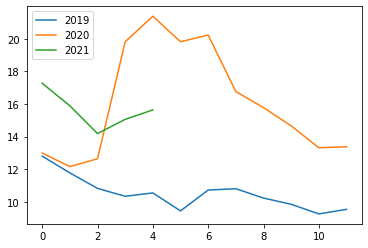

In [10]:
plt.plot(meses['2019'].values)
plt.plot(meses['2020'].values)
plt.plot(meses['2021'].values)
plt.legend(['2019','2020','2021'], loc=2)

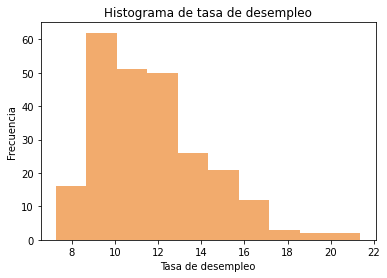

In [111]:
import matplotlib.pyplot as plot

plot.hist(x=df['tasa'], color='#F2AB6D')
plot.title('Histograma de tasa de desempleo')
plot.xlabel('Tasa de desempleo')
plot.ylabel('Frecuencia')

plot.show() #dibujamos el histograma

Se realiza la gráfica de la serie de tiempo:


Text(0.5, 1.0, 'Tasa de desempleo')

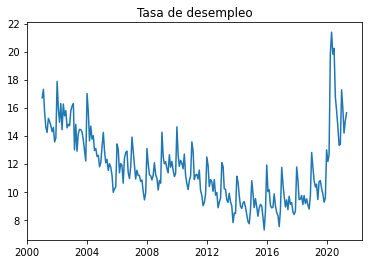

In [112]:

####Graficar la Serie#####
plt.plot(tm)
plt.title('Tasa de desempleo')

Se realiza la gráfica de autocorrelación de la serie

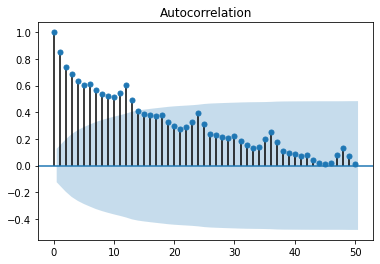

In [113]:
from statsmodels.graphics.tsaplots import plot_acf
tm_acf=plot_acf(tm,lags=50, unbiased=False)


CONCLUSIONES: Al graficar la serie de tiempo de la tasa de desempleo, se puede ver que la serie no es estacionaria debido a que la media parece cambiar a travez del tiempo. Por otro lado, sí hay una estructura de autocorrelación entre los primeros 13 rezagos, lo cual se tendrá en cuenta para la profundidad del arbol de decisión.

---



Se verifica si la serie de tiempo requiere de una transformación de Box-Cox

In [114]:
boxcox=sp.stats.boxcox(tm,alpha=0.05)
print(boxcox)

(array([1.17170902, 1.1760101 , 1.16414163, 1.15454699, 1.15113598,
       1.16022225, 1.15841194, 1.15562024, 1.15165421, 1.15450677,
       1.14438401, 1.14733356, 1.17975336, 1.16533495, 1.15781667,
       1.16869423, 1.15302214, 1.16842773, 1.16170728, 1.1647771 ,
       1.15423056, 1.15652988, 1.15562005, 1.1646875 , 1.1673756 ,
       1.16865088, 1.13822491, 1.15646179, 1.13720004, 1.15026193,
       1.15319059, 1.15309917, 1.15144698, 1.1459276 , 1.13741237,
       1.12873131, 1.17390905, 1.16400065, 1.14513456, 1.15534338,
       1.14645317, 1.1488922 , 1.1377341 , 1.1393606 , 1.13277509,
       1.13372437, 1.12343681, 1.12727519, 1.14082653, 1.15116394,
       1.13782824, 1.12715244, 1.13022567, 1.11998482, 1.12631532,
       1.12313465, 1.11497523, 1.09527239, 1.09969625, 1.1018505 ,
       1.14287492, 1.1384057 , 1.11746516, 1.12649358, 1.12485028,
       1.10632382, 1.13125484, 1.1360435 , 1.13716747, 1.11761653,
       1.11149061, 1.12351395, 1.14789506, 1.13643483, 1.1254

Como en el intervalo de confianza de lambda esta el -1, entonces se tomará la tranformación $Y'=\frac{1}{Y}$.




In [115]:
Y=1/df['tasa']


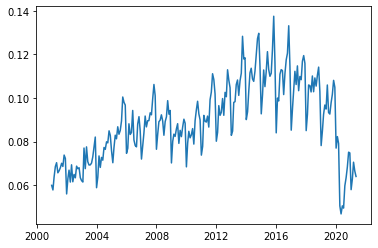

In [116]:
plt.plot(Y)

Fecha
2001-01-01    0.059899
2001-02-01    0.057780
2001-03-01    0.063674
2001-04-01    0.068541
2001-05-01    0.070292
                ...   
2021-01-01    0.057915
2021-02-01    0.062951
2021-03-01    0.070519
2021-04-01    0.066433
2021-05-01    0.063971
Name: tasa, Length: 245, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0, 0.5, 'resid')

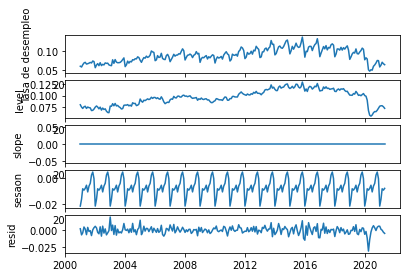

In [117]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
print(Y)
#print(pd.infer_freq(data['Month'], warn=True))
fit1 = ExponentialSmoothing(Y, seasonal_periods=12, seasonal='add').fit(use_boxcox=False)
####ejecutar desde la línea 74 hasta la 88
plt.subplot(5, 1, 1)
plt.plot(Y)
plt.ylabel('Tasa de desempleo') 
plt.subplot(5, 1, 2)
plt.plot(fit1.level)
plt.ylabel('level') 
plt.subplot(5, 1, 3)
plt.plot(fit1.slope)
plt.ylabel('slope') 
plt.subplot(5, 1, 4)
plt.plot(fit1.season)
plt.ylabel('sesaon') 
plt.subplot(5, 1, 5)
plt.plot(fit1.resid)
plt.ylabel('resid')

**ARBOLES**

In [118]:
da=pd.DataFrame(data=Y)

In [119]:
from pandas import DataFrame
# reframe as supervised learning
# lag observation (t-1) is the input variable and t is the output variable.
df1 = pd.DataFrame()
print(df1)

Empty DataFrame
Columns: []
Index: []


In [120]:
da.shape

(245, 1)

In [121]:
#Y.shift()
for i in range(13,0,-1):
    df1[['t-'+str(i)]] = da.shift(i)


In [122]:
df1

,t-13,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
Fecha,,,,,,,,,,,,,
2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059899
2001-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059899,0.057780
2001-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059899,0.057780,0.063674
2001-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059899,0.057780,0.063674,0.068541
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01,0.104913,0.076994,0.082269,0.079151,0.050477,0.046776,0.050471,0.049447,0.059676,0.063407,0.068256,0.075125,0.074785
2021-02-01,0.076994,0.082269,0.079151,0.050477,0.046776,0.050471,0.049447,0.059676,0.063407,0.068256,0.075125,0.074785,0.057915
2021-03-01,0.082269,0.079151,0.050477,0.046776,0.050471,0.049447,0.059676,0.063407,0.068256,0.075125,0.074785,0.057915,0.062951


In [123]:
# Create column t
df1['t'] = da['tasa']
print(df1.head(18))

                t-13      t-12      t-11  ...       t-2       t-1         t
Fecha                                     ...                              
2001-01-01       NaN       NaN       NaN  ...       NaN       NaN  0.059899
2001-02-01       NaN       NaN       NaN  ...       NaN  0.059899  0.057780
2001-03-01       NaN       NaN       NaN  ...  0.059899  0.057780  0.063674
2001-04-01       NaN       NaN       NaN  ...  0.057780  0.063674  0.068541
2001-05-01       NaN       NaN       NaN  ...  0.063674  0.068541  0.070292
2001-06-01       NaN       NaN       NaN  ...  0.068541  0.070292  0.065651
2001-07-01       NaN       NaN       NaN  ...  0.070292  0.065651  0.066569
2001-08-01       NaN       NaN       NaN  ...  0.065651  0.066569  0.067992
2001-09-01       NaN       NaN       NaN  ...  0.066569  0.067992  0.070026
2001-10-01       NaN       NaN       NaN  ...  0.067992  0.070026  0.068561
2001-11-01       NaN       NaN       NaN  ...  0.070026  0.068561  0.073792
2001-12-01  

In [124]:
df1_tas = df1[13:]
print(df1_tas.head(18))
df1_tas.shape

                t-13      t-12      t-11  ...       t-2       t-1         t
Fecha                                     ...                              
2002-02-01  0.059899  0.057780  0.063674  ...  0.072258  0.055951  0.063075
2002-03-01  0.057780  0.063674  0.068541  ...  0.055951  0.063075  0.066872
2002-04-01  0.063674  0.068541  0.070292  ...  0.063075  0.066872  0.061396
2002-05-01  0.068541  0.070292  0.065651  ...  0.066872  0.061396  0.069322
2002-06-01  0.070292  0.065651  0.066569  ...  0.061396  0.069322  0.061529
2002-07-01  0.065651  0.066569  0.067992  ...  0.069322  0.061529  0.064900
2002-08-01  0.066569  0.067992  0.070026  ...  0.061529  0.064900  0.063355
2002-09-01  0.067992  0.070026  0.068561  ...  0.064900  0.063355  0.068703
2002-10-01  0.070026  0.068561  0.073792  ...  0.063355  0.068703  0.067528
2002-11-01  0.068561  0.073792  0.072258  ...  0.068703  0.067528  0.067992
2002-12-01  0.073792  0.072258  0.055951  ...  0.067528  0.067992  0.063400
2003-01-01  

(232, 14)

In [125]:
INDsplit = df1_tas.values
X1= INDsplit[:, 0:-1]  
y1 =INDsplit[:,-1] 

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [127]:
Y1 = y1
traintarget_size = int(len(Y1) * 0.8)  
train_target, test_target = Y1[0:traintarget_size], Y1[traintarget_size:len(Y1)]
trainfeature_size = int(len(X1) * 0.8)
train_feature, test_feature = X1[0:trainfeature_size], X1[trainfeature_size:len(X1)] 

In [128]:
print('Observations for Target: %d' % (len(Y1)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 232
Training Observations for Target: 185
Testing Observations for Target: 47


In [129]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_IND = DecisionTreeRegressor() 

In [130]:


for d in [2, 3, 4, 5,7,8,10, 13]:
    # Create the tree and fit it
    decision_tree_IND = DecisionTreeRegressor(max_depth=d)
    decision_tree_IND.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree_IND.score(train_feature, train_target))
    print(decision_tree_IND.score(test_feature, test_target), '\n') 

max_depth= 2
0.8034809463336477
0.29824353168113016 

max_depth= 3
0.8737694356580454
0.43720848022803815 

max_depth= 4
0.9068717178497128
0.36335818786111596 

max_depth= 5
0.9422347143837063
0.43097476380297317 

max_depth= 7
0.9786490859619424
0.2905667662415995 

max_depth= 8
0.987918959981403
0.41222076412779945 

max_depth= 10
0.9983901493588754
0.4317523002007666 

max_depth= 13
0.999934305766683
0.33666560560354863 



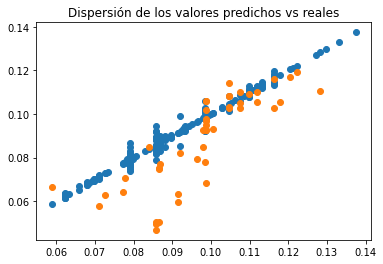

In [131]:
from matplotlib import pyplot as plt

# Use the best max_depth 
decision_tree_tas= DecisionTreeRegressor(max_depth=7)  # fill in best max depth here
decision_tree_tas.fit(train_feature, train_target)

# Predict values for train and test
train_prediction = decision_tree_tas.predict(train_feature)
test_prediction = decision_tree_tas.predict(test_feature)

# Scatter the predictions vs actual values
plt.scatter(train_prediction, train_target, label='train')  # blue
plt.scatter(test_prediction, test_target, label='test')  # orange
plt.title('Dispersión de los valores predichos vs reales')
plt.show()

In [132]:
from sklearn import tree

listacaract=list(df1_tas.columns.values)
respuesta=listacaract.pop()
text_representation = tree.export_text(decision_tree_tas)
print(text_representation)

|--- feature_1 <= 0.10
|   |--- feature_1 <= 0.08
|   |   |--- feature_12 <= 0.07
|   |   |   |--- feature_2 <= 0.06
|   |   |   |   |--- feature_5 <= 0.06
|   |   |   |   |   |--- value: [0.06]
|   |   |   |   |--- feature_5 >  0.06
|   |   |   |   |   |--- value: [0.08]
|   |   |   |--- feature_2 >  0.06
|   |   |   |   |--- feature_1 <= 0.07
|   |   |   |   |   |--- feature_10 <= 0.08
|   |   |   |   |   |   |--- feature_3 <= 0.07
|   |   |   |   |   |   |   |--- value: [0.06]
|   |   |   |   |   |   |--- feature_3 >  0.07
|   |   |   |   |   |   |   |--- value: [0.07]
|   |   |   |   |   |--- feature_10 >  0.08
|   |   |   |   |   |   |--- value: [0.07]
|   |   |   |   |--- feature_1 >  0.07
|   |   |   |   |   |--- feature_1 <= 0.08
|   |   |   |   |   |   |--- feature_7 <= 0.07
|   |   |   |   |   |   |   |--- value: [0.07]
|   |   |   |   |   |   |--- feature_7 >  0.07
|   |   |   |   |   |   |   |--- value: [0.07]
|   |   |   |   |   |--- feature_1 >  0.08
|   |   |   |   |   |

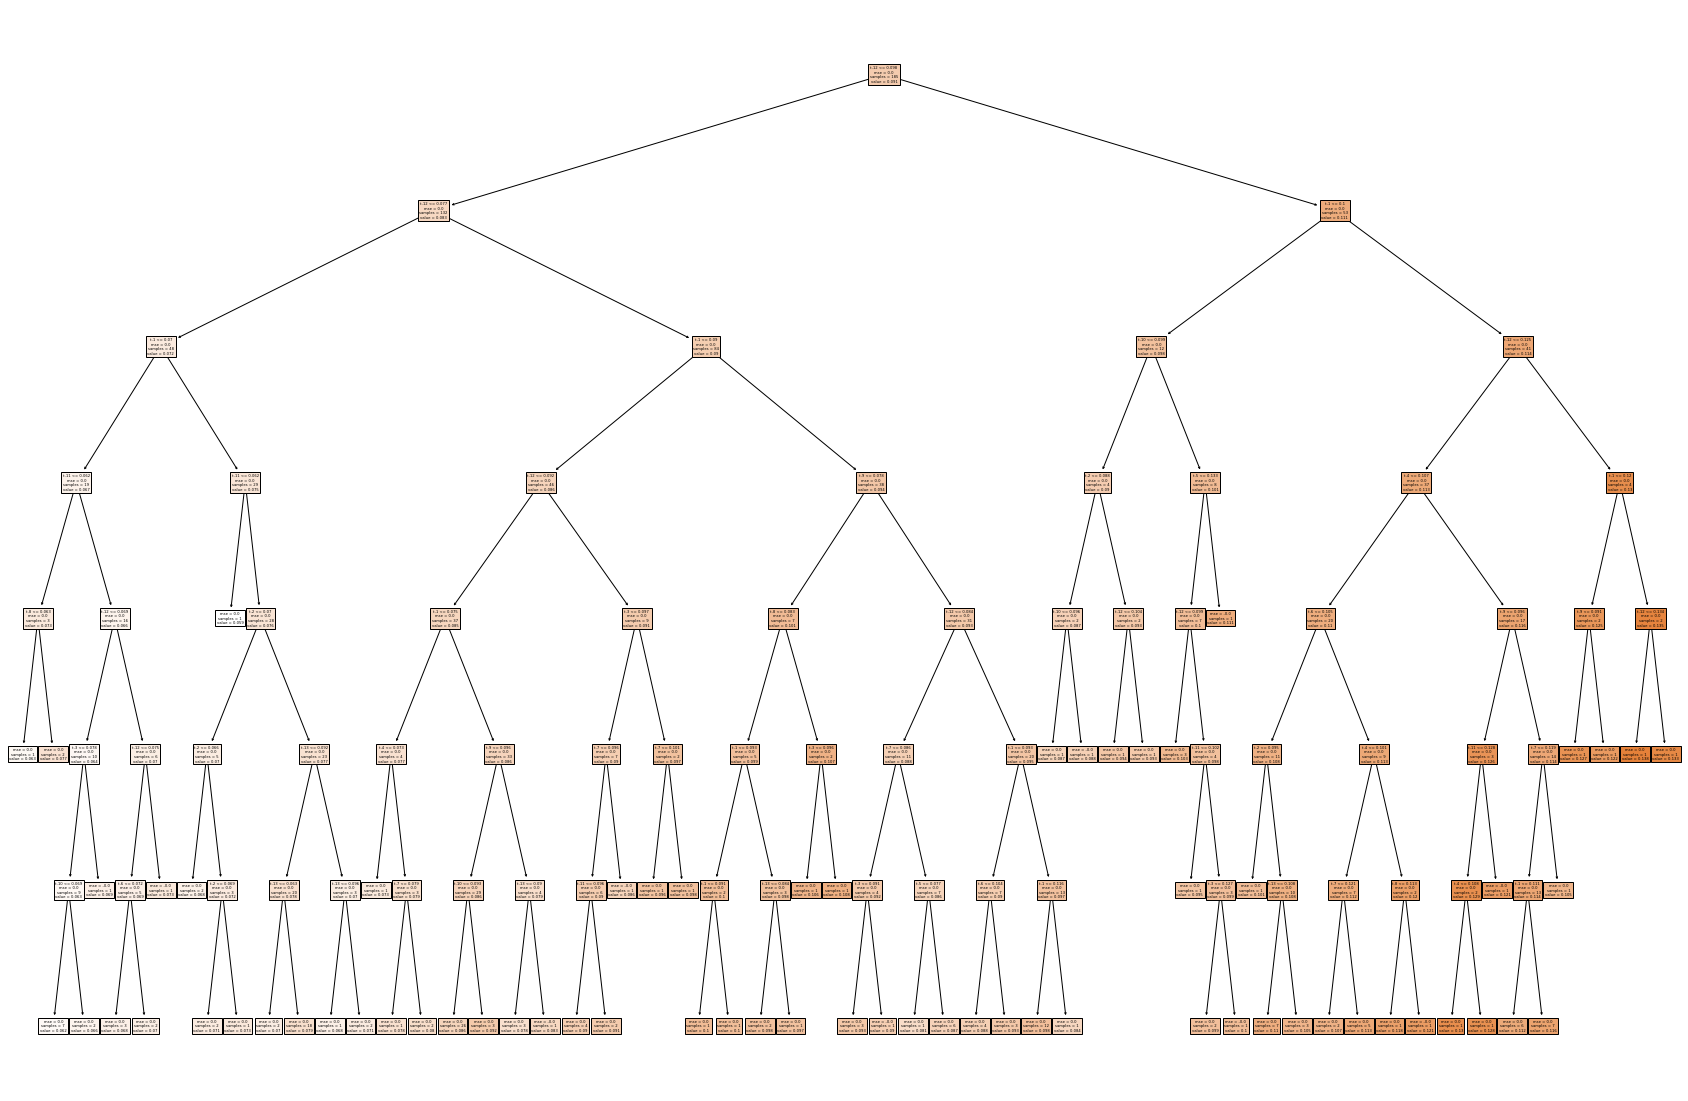

In [133]:
fig = plt.figure(figsize=(30,20))
_ = tree.plot_tree(decision_tree_tas, 
                   feature_names=listacaract,  
                   class_names=respuesta,
                   filled=True)
plt.savefig("fig.png")

In [134]:
print(train_prediction.size)
print(train_target.size)

print(test_prediction.size)
print(test_target.size)

185
185
47
47


In [135]:
indicetrian_test=df1_tas.index
print(indicetrian_test.size)  ###Tamaño del índice
indicetrain=indicetrian_test[0:185]
indicetest=indicetrian_test[185:232]

232


In [136]:
print(indicetrain.size)
print(indicetest.size)

185
47


In [137]:
targetjoint=np.concatenate((train_target,test_target))
predictionjoint=np.concatenate((train_prediction,test_prediction))
print(targetjoint.size)
print(predictionjoint.size)

232
232


In [138]:
d = {'observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred=pd.DataFrame(data=d,index=indicetrian_test)
print(d)
ObsvsPred.head(10)

{'observado': array([0.06307475, 0.06687212, 0.06139612, 0.06932241, 0.06152887,
       0.0649001 , 0.0633546 , 0.06870276, 0.06752758, 0.06799199,
       0.06339957, 0.06205368, 0.06141771, 0.0770207 , 0.0675623 ,
       0.07756132, 0.07074297, 0.06923595, 0.06928287, 0.07013219,
       0.07298808, 0.07744924, 0.08206433, 0.0588129 , 0.06374462,
       0.07340076, 0.06813337, 0.07271491, 0.07145057, 0.07727949,
       0.07642274, 0.07990624, 0.07940172, 0.08491145, 0.08284494,
       0.07565262, 0.07027795, 0.07722984, 0.08291083, 0.08126515,
       0.08678074, 0.08336052, 0.08507467, 0.08951145, 0.10045192,
       0.09796818, 0.09676434, 0.07457978, 0.07692543, 0.08815156,
       0.08326471, 0.08414899, 0.0942765 , 0.08071589, 0.07817252,
       0.07757851, 0.08806905, 0.09142329, 0.0848698 , 0.0719668 ,
       0.07796558, 0.08384029, 0.09171139, 0.0867388 , 0.08956696,
       0.08960964, 0.09318459, 0.09228263, 0.09952374, 0.10620506,
       0.10107271, 0.07645826, 0.08343416, 0.089

,observado,Predicción
Fecha,,
2002-02-01,0.063075,0.062367
2002-03-01,0.066872,0.065886
2002-04-01,0.061396,0.062367
2002-05-01,0.069322,0.069727
2002-06-01,0.061529,0.062367
2002-07-01,0.064900,0.065886
2002-08-01,0.063355,0.062367
2002-09-01,0.068703,0.068074
2002-10-01,0.067528,0.068074


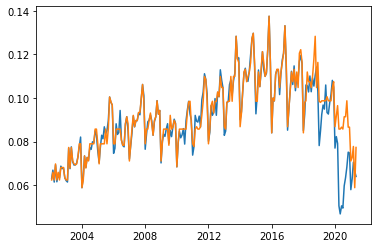

In [139]:
plt.plot(ObsvsPred)

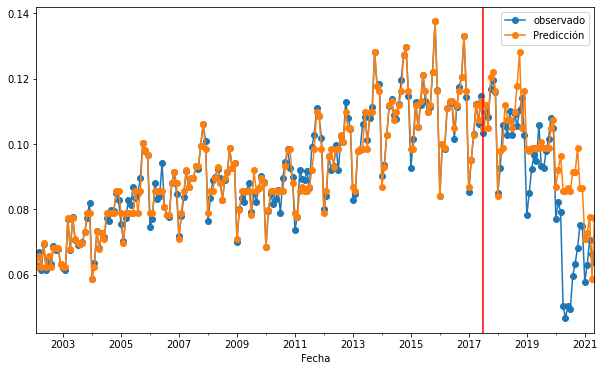

In [140]:
ax = ObsvsPred.plot( marker="o", figsize=(10,6))
ax.axvline(x=indicetrian_test[185].date(),color='red')

**MEDIA CUADRATICA DEL ERROR**

In [144]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_target, test_prediction)



0.00023771586046208225

In [142]:
error=d['observado']-d['Predicción']

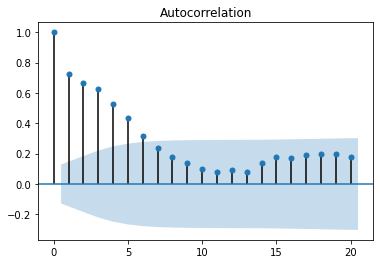

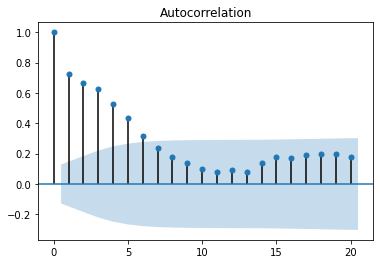

In [143]:
plot_acf(error, lags=20)

**REDES NEURONALES**

In [145]:
import tensorflow.keras as keras

In [146]:
X_train_full, X_test, y_train_full, y_test=train_test_split(X1,y1,test_size=0.2, train_size=0.8)

In [147]:
print(X_train_full.shape)
print(X_test.shape)

print(y_train_full.shape)
print(y_test.shape)

(185, 13)
(47, 13)
(185,)
(47,)


In [148]:
X_train, X_val, y_train, y_val=train_test_split(X_train_full,y_train_full,test_size=0.000001, train_size=0.9999)

In [149]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train_full)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

In [150]:
X_test


array([[0.47749193, 0.5134503 , 0.58357075, 0.49890171, 0.61489624,
        0.62282246, 0.72913519, 0.71024308, 0.69854318, 0.39749449,
        0.41921307, 0.56418338, 0.59632973],
       [0.20571003, 0.35945479, 0.41780913, 0.38501099, 0.39972024,
        0.45337426, 0.35325973, 0.49559814, 0.57639193, 0.56986542,
        0.50554483, 0.47546387, 0.31243446],
       [0.4170173 , 0.40310328, 0.42199046, 0.47087671, 0.59142318,
        0.59257058, 0.55079202, 0.32184029, 0.36357288, 0.45589286,
        0.40204762, 0.4117909 , 0.54983793],
       [0.26781677, 0.28077008, 0.10109639, 0.17958638, 0.22142733,
        0.169234  , 0.24842564, 0.17077069, 0.21855917, 0.18266986,
        0.24159812, 0.2286495 , 0.2455839 ],
       [0.36513625, 0.43894903, 0.4791894 , 0.45869319, 0.23809751,
        0.37762597, 0.41780913, 0.40447409, 0.43747122, 0.43155812,
        0.35325973, 0.47175019, 0.55327638],
       [0.71657308, 0.64393857, 0.71795205, 0.82084977, 0.73111358,
        0.73141708, 0.71149

In [151]:
y_train

array([0.09226609, 0.10567936, 0.11036067, 0.04944735, 0.09952374,
       0.10875933, 0.07817252, 0.07722984, 0.08960964, 0.0942765 ,
       0.09265783, 0.08384029, 0.10788852, 0.11154486, 0.08893403,
       0.09171139, 0.11193533, 0.10826403, 0.0719668 , 0.08326471,
       0.0649001 , 0.07744924, 0.08678074, 0.07915083, 0.0867388 ,
       0.08959073, 0.06205368, 0.11438041, 0.09921226, 0.11946626,
       0.08343416, 0.09489788, 0.06141771, 0.0986447 , 0.10107271,
       0.0848226 , 0.07340076, 0.11365914, 0.0588129 , 0.08951145,
       0.07796558, 0.06295146, 0.05791469, 0.07883686, 0.1168827 ,
       0.0633546 , 0.11285904, 0.10286912, 0.07692543, 0.09318459,
       0.101197  , 0.10596483, 0.08305349, 0.11793236, 0.11417681,
       0.08226416, 0.06139612, 0.09228263, 0.10809702, 0.08507467,
       0.07074297, 0.08497333, 0.12722219, 0.10546092, 0.09878273,
       0.08815156, 0.06397057, 0.11975545, 0.10620506, 0.13753322,
       0.11134906, 0.05967564, 0.07027795, 0.08573456, 0.07565

In [152]:
y_test

array([0.10614425, 0.07774524, 0.08071589, 0.06339957, 0.09849539,
       0.11091629, 0.11473782, 0.1111377 , 0.09796818, 0.08236675,
       0.11590992, 0.09676434, 0.08950557, 0.09457355, 0.11642911,
       0.10157122, 0.06374462, 0.10597748, 0.10491254, 0.07013219,
       0.06838506, 0.07815273, 0.05047665, 0.06307475, 0.08992777,
       0.085943  , 0.08501704, 0.08226889, 0.08414899, 0.09797971,
       0.07376721, 0.12970145, 0.11302695, 0.07145057, 0.11464059,
       0.10921305, 0.1122622 , 0.08338989, 0.0890908 , 0.08985326,
       0.11234658, 0.07699416, 0.10045192, 0.09205492, 0.06799199,
       0.11845312, 0.06923595])

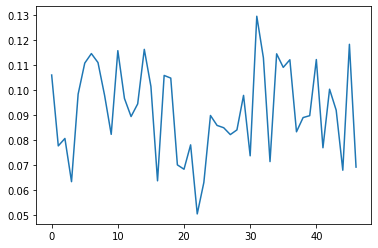

In [153]:
plt.plot(y_test)

In [154]:

print(X_train.shape)
print(X_val.shape)

print(y_train.shape)
print(y_val.shape)

(185, 13)
(1, 13)
(184,)
(1,)


In [155]:
import tensorflow.keras as keras

In [156]:
input_layer = keras.layers.Input(shape=X_train_full.shape[1:])
hidden1 = keras.layers.Dense(32,activation="relu")(input_layer)
hidden2 = keras.layers.Dense(32,activation="relu")(hidden1)
hidden3 = keras.layers.Dense(32,activation="relu")(hidden2)
dropout_layer = keras.layers.Dropout(0.2)(hidden3)
output_layer = keras.layers.Dense(1, activation='relu')(dropout_layer)

In [157]:
ts_model=keras.Model(inputs=[input_layer],outputs=[output_layer])
ts_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 2,593
Trainable params: 2,593
Non-trainable params: 0
_________________________________________________________

In [158]:
ts_model.compile(loss="mean_squared_error",optimizer="adam")
history=ts_model.fit(X_train,y_train_full,epochs=100,batch_size=16,validation_data=(X_test,y_test) )

Epoch 1/100
12/12 [==============================] - 1s 12ms/step - loss: 0.0063 - val_loss: 0.0043
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 4.7758e-04
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 4.6209e-04
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 4.0625e-04
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 3.3072e-04
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 8.6979e-04 - val_loss: 2.6270e-04
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 5.9998e-04 - val_loss: 2.3238e-04
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 5.0885e-04 - val_loss: 2.1504e-04
Epoch 9/100
12/12 [==============================] - 0s 4ms/step - loss: 3.6847e-04 - val_loss: 1.9003e-04
Epoch 10/100
12/12 [==============================] - 0s 3ms

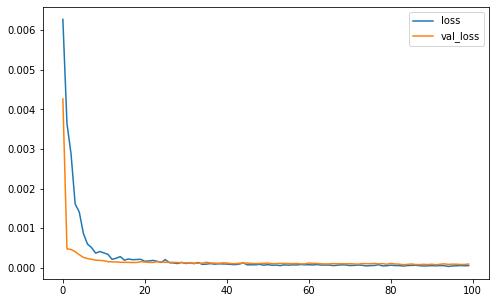

In [159]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [160]:
mse_test=ts_model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 9.3506e-05


In [161]:
print(mse_test)

9.350550681119785e-05


In [162]:
X_test

array([[0.47749193, 0.5134503 , 0.58357075, 0.49890171, 0.61489624,
        0.62282246, 0.72913519, 0.71024308, 0.69854318, 0.39749449,
        0.41921307, 0.56418338, 0.59632973],
       [0.20571003, 0.35945479, 0.41780913, 0.38501099, 0.39972024,
        0.45337426, 0.35325973, 0.49559814, 0.57639193, 0.56986542,
        0.50554483, 0.47546387, 0.31243446],
       [0.4170173 , 0.40310328, 0.42199046, 0.47087671, 0.59142318,
        0.59257058, 0.55079202, 0.32184029, 0.36357288, 0.45589286,
        0.40204762, 0.4117909 , 0.54983793],
       [0.26781677, 0.28077008, 0.10109639, 0.17958638, 0.22142733,
        0.169234  , 0.24842564, 0.17077069, 0.21855917, 0.18266986,
        0.24159812, 0.2286495 , 0.2455839 ],
       [0.36513625, 0.43894903, 0.4791894 , 0.45869319, 0.23809751,
        0.37762597, 0.41780913, 0.40447409, 0.43747122, 0.43155812,
        0.35325973, 0.47175019, 0.55327638],
       [0.71657308, 0.64393857, 0.71795205, 0.82084977, 0.73111358,
        0.73141708, 0.71149

In [163]:
ypred=ts_model.predict(X_test)
ypredtrain=ts_model.predict(X_train)
print(ypred)
print(ypred.shape)

[[0.09853959]
 [0.08342277]
 [0.08395804]
 [0.07279911]
 [0.09660241]
 [0.10220959]
 [0.11422892]
 [0.10356323]
 [0.09442847]
 [0.08289455]
 [0.10613833]
 [0.08990836]
 [0.09708215]
 [0.08699297]
 [0.10837808]
 [0.1067872 ]
 [0.07571036]
 [0.09785417]
 [0.09372375]
 [0.07013937]
 [0.08402185]
 [0.09210455]
 [0.08586694]
 [0.07304329]
 [0.09274092]
 [0.08311892]
 [0.09323089]
 [0.08761903]
 [0.09195516]
 [0.09243126]
 [0.07804628]
 [0.11142927]
 [0.10366621]
 [0.07871561]
 [0.11921485]
 [0.10544445]
 [0.10837648]
 [0.08761833]
 [0.09128706]
 [0.08790289]
 [0.10618629]
 [0.09038372]
 [0.09132633]
 [0.09158985]
 [0.07374889]
 [0.09672514]
 [0.07074011]]
(47, 1)


Text(0.5, 0, 'Index')

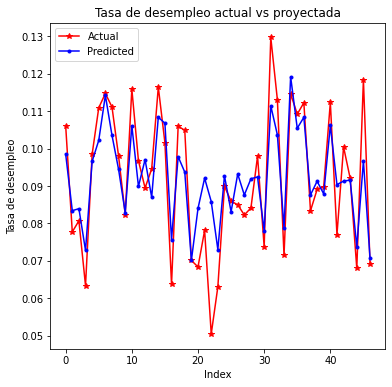

In [164]:
plt.figure(figsize=(6, 6))
plt.plot(range(y_test.size), y_test, linestyle='-', marker='*', color='r')
plt.plot(range(ypred.size), ypred, linestyle='-', marker='.', color='b') 
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Tasa de desempleo actual vs proyectada')
plt.ylabel('Tasa de desempleo')
plt.xlabel('Index')

Text(0.5, 0, 'Indice')

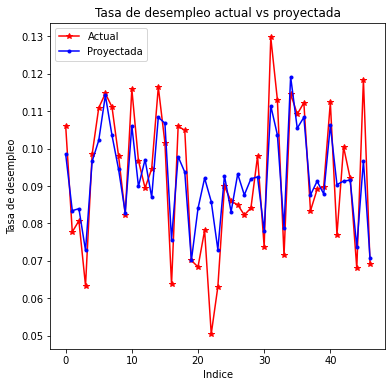

In [165]:
plt.figure(figsize=(6, 6))
plt.plot(range(47), y_test[0:47], linestyle='-', marker='*', color='r')
plt.plot(range(47), ypred[0:47], linestyle='-', marker='.', color='b') 
plt.legend(['Actual','Proyectada'], loc=2)
plt.title('Tasa de desempleo actual vs proyectada')
plt.ylabel('Tasa de desempleo')
plt.xlabel('Indice')

In [166]:
target=np.concatenate((y_train_full,y_test))
prediction=np.concatenate((ypredtrain,ypred))
print(target.size)
print(prediction.size)
print(ypredtrain.size)
print(ypred.size)

232
232
185
47


In [167]:

ypreddf=pd.DataFrame(ypred)
print(ypreddf)

           0
0   0.098540
1   0.083423
2   0.083958
3   0.072799
4   0.096602
5   0.102210
6   0.114229
7   0.103563
8   0.094428
9   0.082895
10  0.106138
11  0.089908
12  0.097082
13  0.086993
14  0.108378
15  0.106787
16  0.075710
17  0.097854
18  0.093724
19  0.070139
20  0.084022
21  0.092105
22  0.085867
23  0.073043
24  0.092741
25  0.083119
26  0.093231
27  0.087619
28  0.091955
29  0.092431
30  0.078046
31  0.111429
32  0.103666
33  0.078716
34  0.119215
35  0.105444
36  0.108376
37  0.087618
38  0.091287
39  0.087903
40  0.106186
41  0.090384
42  0.091326
43  0.091590
44  0.073749
45  0.096725
46  0.070740


In [168]:
e=y_test-ypreddf[0]
#print(ypreddf)
#print(e)
sum(e**2)

0.0043947585804250565

In [102]:
ecm=sum(e**2)/47
print(ecm)

1.8909025454154098


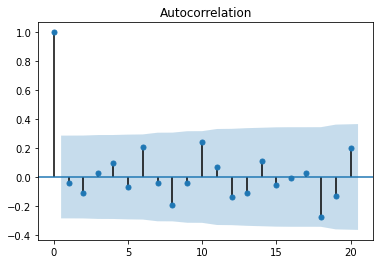

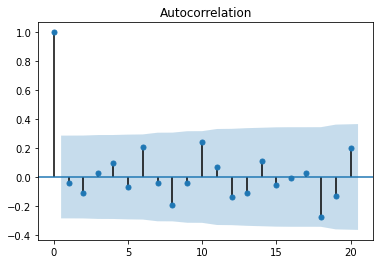

In [103]:
plot_acf(e, lags=20)